In [36]:
import pandas as pd
import numpy as np
from IPython.display import display

# File list (16 total, 8 categories)
# 103_student, 104_student, 105_student, 106_student, 107_student
# 103_staff, 104_staff, 105_staff, 106_staff, 107_staff
# 105_106_107_foreign_student_country
# 106_107_foreign_student
# 106_107_overseas_chinese_compatriot
# 105_106_double_degree_university
# 105_106_dropout
# 106_double_major

student = list()
staff = list()
for i in range (3, 8):
    temp = pd.read_csv('10{0}_student.csv'.format(i))
    student.append(temp)
    temp = pd.read_csv('10{0}_staff.csv'.format(i))
    staff.append(temp)
    
foreign_student_country = pd.read_csv('105_106_107_foreign_student_country.csv')
foreign_student = pd.read_csv('106_107_foreign_student.csv')
overseas_chines

e = pd.read_csv('106_107_overseas_chinese_compatriot.csv')
double_degree_university = pd.read_csv('105_106_double_degree_university.csv')
dropout = pd.read_csv('105_106_dropout.csv')
double_major = pd.read_csv('106_double_major.csv')

In [37]:
# Data reorganisation, considering data only from year 106
###Category 106 student###
student_df = student[3].copy()
student_df.iloc[:, 4:20] = student_df.iloc[:, 4:20].replace('-','0')
student_df.iloc[:, 4:20] = student_df.iloc[:, 4:20].replace(',','', regex=True).astype(int)
# groupby 學校代碼
student_gb = student_df.groupby(['學校代碼'])['一年級男生','一年級女生','二年級男生','二年級女生',
                                        '三年級男生','三年級女生','四年級男生','四年級女生',
                                        '五年級男生','五年級女生','六年級男生','六年級女生',
                                        '七年級男生','七年級女生','延修生男生','延修生女生'].sum().reset_index()
student_gb['學生總和'] = student_gb.iloc[:,1:].sum(axis=1)
student_gb['男學生總和'] = student_gb.loc[:, student_gb.columns.str.contains('男')].sum(axis=1)
student_gb['女學生總和'] = student_gb.loc[:, student_gb.columns.str.contains('女')].sum(axis=1)
student_gb['延畢生總和'] = student_gb[['延修生男生','延修生女生']].sum(axis=1)
student_gb['學校代碼'] = student_gb['學校代碼'].astype(str)

###Category 106 staff###
staff_df = staff[3].copy()
staff_gb = staff_df.groupby(['學校代碼']).sum().reset_index()
staff_gb['教師總和'] = staff_gb.iloc[:, 1:].sum(axis=1)
staff_gb['學校代碼'] = staff_gb['學校代碼'].astype(str)

###Category 106 foreign_student###
foreign_student_df = foreign_student.copy()
foreign_student_df = foreign_student_df.rename(columns={'學校統計處代碼':'學校代碼'})
foreign_student_gb = foreign_student_df[foreign_student_df['學年度']==106]
foreign_student_gb = foreign_student_gb.groupby(['學校代碼'])['外國學生人數男','外國學生人數女'].sum().reset_index()
foreign_student_gb['外籍生總和'] = foreign_student_gb.iloc[:, 1:].sum(axis=1)
foreign_student_gb['學校代碼'] = foreign_student_gb['學校代碼'].astype(str)

###Category 106 overseas_chinese_compatriot###
overseas_chinese_df = overseas_chinese.copy()
overseas_chinese_df = overseas_chinese_df.rename(columns={'學校統計處代碼':'學校代碼'})
overseas_chinese_gb = overseas_chinese_df[overseas_chinese_df['學年度']==106]
overseas_chinese_gb = overseas_chinese_gb.groupby(['學校代碼'])['僑生男', '僑生女','港澳生男','港澳生女'].sum().reset_index()
overseas_chinese_gb['僑生總和'] = overseas_chinese_gb.iloc[:,1:].sum(axis=1)
overseas_chinese_gb['學校代碼'] = overseas_chinese_gb['學校代碼'].astype(str)

###Category 106 double_degree_university###
double_degree_university_df = double_degree_university.copy()
double_degree_university_df = double_degree_university_df.rename(columns={'學校統計處代碼':'學校代碼'})
double_degree_university_gb = double_degree_university_df[double_degree_university_df['學年度']==106]
double_degree_university_gb = double_degree_university_gb.groupby(['學校代碼'])['建立跨國(境)學位合作(雙聯學制)學校數'].sum().reset_index()
double_degree_university_gb['學校代碼'] = double_degree_university_gb['學校代碼'].astype(str)

###Category 106 dropout###
dropout_df = dropout.copy()
dropout_df = dropout_df.rename(columns={'學校統計處代碼':'學校代碼'})
dropout_gb = dropout_df[dropout_df['學年度']==106]
dropout_gb = dropout_gb[['學校代碼','設立別','學校類別','退學人數小計']]
dropout_gb = dropout_gb.groupby(['學校代碼','設立別','學校類別']).sum().reset_index()
dropout_gb['學校代碼'] = dropout_gb['學校代碼'].astype(str)

###Category 106 double_major###
double_major_df = double_major.copy()
double_major_df = double_major_df.rename(columns={'學校統計處代碼':'學校代碼'})
double_major_gb = double_major_df.groupby(['學校代碼'])['修讀雙主修人次男','修讀雙主修人次女'].sum().reset_index()
double_major_gb['雙主修總和'] = double_major_gb.iloc[:, 1:].sum(axis=1)
double_major_gb['學校代碼'] = double_major_gb['學校代碼'].astype(str)

# Combining All Required Cols into new dataframe
combined_df = student_gb[['學校代碼','學生總和','男學生總和','女學生總和','延畢生總和']].copy()
combined_df = pd.merge(combined_df, staff_gb[['學校代碼','教師總和']], on='學校代碼', how='outer')
combined_df = pd.merge(combined_df, foreign_student_gb[['學校代碼','外籍生總和']], on='學校代碼', how='outer')
combined_df = pd.merge(combined_df, overseas_chinese_gb[['學校代碼','僑生總和']], on='學校代碼', how='outer')
combined_df = pd.merge(combined_df, double_degree_university_gb[['學校代碼','建立跨國(境)學位合作(雙聯學制)學校數']], on='學校代碼', how='outer')
combined_df = pd.merge(combined_df, dropout_gb[['學校代碼','退學人數小計','設立別','學校類別']], on='學校代碼', how='outer')
combined_df = pd.merge(combined_df, double_major_gb[['學校代碼','雙主修總和']], on='學校代碼', how='outer')
display(combined_df.head())
combined_df.to_csv('output.csv', encoding='utf-8-sig')

,學校代碼,學生總和,男學生總和,女學生總和,延畢生總和,教師總和,外籍生總和,僑生總和,建立跨國(境)學位合作(雙聯學制)學校數,退學人數小計,設立別,學校類別,雙主修總和
0,1,16353.0,7216.0,9137.0,747.0,722.0,537.0,622.0,35.0,569.0,公立,一般大學,2714.0
1,2,16664.0,9534.0,7130.0,425.0,824.0,504.0,444.0,4.0,612.0,公立,一般大學,231.0
2,3,31802.0,19054.0,12748.0,1209.0,2045.0,871.0,1297.0,48.0,1279.0,公立,一般大學,1399.0
3,4,15426.0,6514.0,8912.0,514.0,826.0,598.0,662.0,19.0,731.0,公立,一般大學,837.0
4,5,21252.0,13490.0,7762.0,602.0,1326.0,828.0,677.0,34.0,1037.0,公立,一般大學,644.0


,大學學生人數,大學僑生人數,大學外籍生人數,大學教師人數,大學延畢生人數,大學退學生人數
1,國立臺灣大學 31802人,國立臺灣大學 1297人,國立臺灣大學 871人,國立臺灣大學 2045人,中國文化大學 1800人,明新學校財團法人明新科技大學 2178人
2,輔仁大學 27017人,淡江大學 945人,國立成功大學 828人,國立成功大學 1326人,輔仁大學 1446人,中國文化大學 2075人
3,淡江大學 26032人,銘傳大學 773人,銘傳大學 797人,國立臺灣師範大學 826人,淡江大學 1358人,輔仁大學 1762人
4,中國文化大學 25885人,中國文化大學 717人,國立臺灣科技大學 747人,國立清華大學 824人,國立臺灣大學 1209人,淡江大學 1675人
5,國立成功大學 21252人,國立暨南國際大學 678人,義守大學 711人,國立中興大學 769人,銘傳大學 971人,正修學校財團法人正修科技大學 1539人
6,逢甲大學 21146人,國立成功大學 677人,國立臺灣師範大學 598人,淡江大學 759人,南臺學校財團法人南臺科技大學 833人,國立高雄科技大學 1363人
7,銘傳大學 19129人,義守大學 668人,開南大學 554人,中國文化大學 746人,明新學校財團法人明新科技大學 796人,國立臺灣大學 1279人
8,南臺學校財團法人南臺科技大學 18855人,輔仁大學 667人,淡江大學 550人,國立政治大學 722人,國立政治大學 747人,義守大學 1255人
9,正修學校財團法人正修科技大學 16903人,國立臺灣師範大學 662人,國立交通大學 549人,國立交通大學 722人,靜宜大學 727人,南臺學校財團法人南臺科技大學 1251人
10,國立清華大學 16664人,逢甲大學 660人,國立政治大學 537人,輔仁大學 698人,東吳大學 714人,實踐大學 1237人


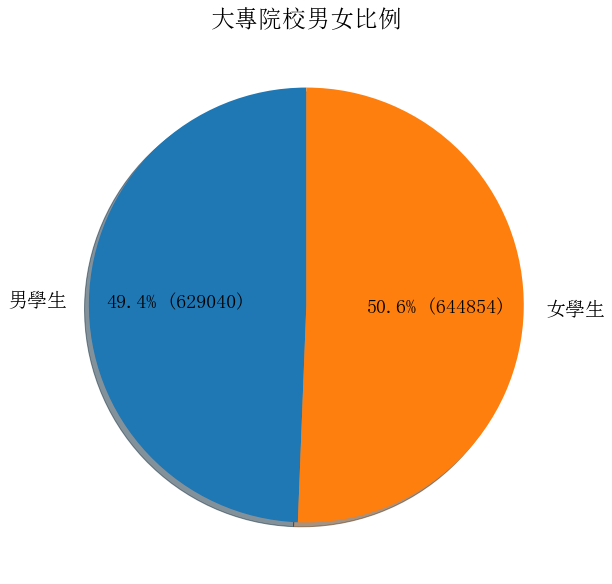

<Figure size 432x288 with 0 Axes>

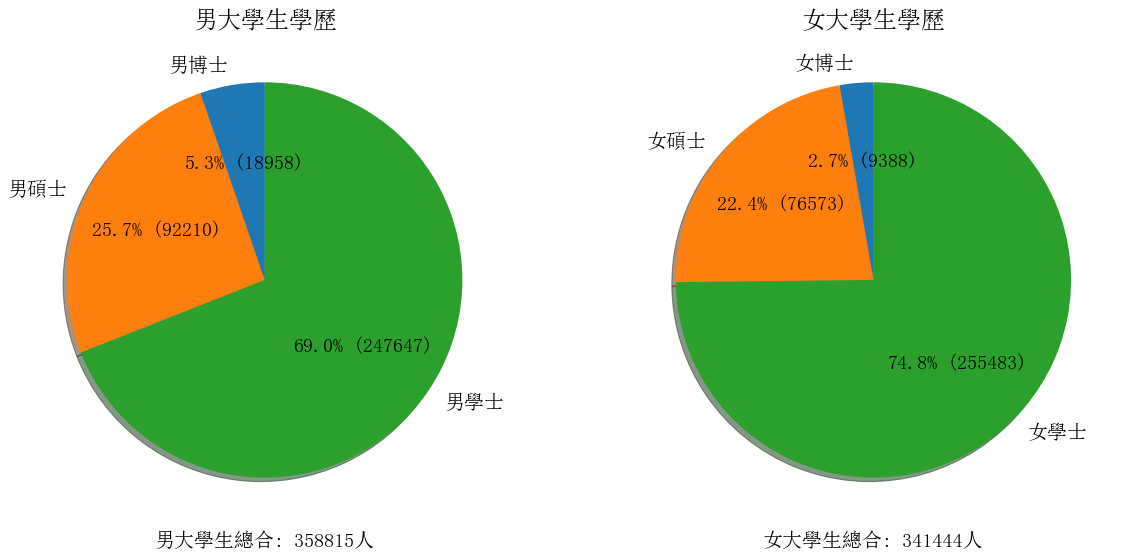

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Font to display Chinese characters
font_name = "SimSun"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.size'] = 20

# Simple Ranking (saved as ranking.csv)
sorting_df = combined_df.copy()
school_id2name = dropout_df.groupby(['學校代碼'])['學校名稱'].max().reset_index()
sorting_df = pd.merge(sorting_df, school_id2name[['學校代碼','學校名稱']].astype(str), on='學校代碼', how='outer')
ranking_df = pd.DataFrame(columns=['大學學生人數','大學僑生人數','大學外籍生人數',
                                   '大學教師人數','大學延畢生人數','大學退學生人數'])

sorting_df.sort_values('學生總和', inplace=True, ascending=False)
ranking_df['大學學生人數'] = (sorting_df.iloc[0:10,13]+' '+(sorting_df.iloc[0:10,1]).astype(int).astype(str)+'人').reset_index(drop=True)

sorting_df.sort_values('僑生總和', inplace=True, ascending=False)
ranking_df['大學僑生人數'] = (sorting_df.iloc[0:10,13]+' '+(sorting_df.iloc[0:10,7]).astype(int).astype(str)+'人').reset_index(drop=True)

sorting_df.sort_values('外籍生總和', inplace=True, ascending=False)
ranking_df['大學外籍生人數'] = (sorting_df.iloc[0:10,13]+' '+(sorting_df.iloc[0:10,6]).astype(int).astype(str)+'人').reset_index(drop=True)

sorting_df.sort_values('教師總和', inplace=True, ascending=False)
ranking_df['大學教師人數'] = (sorting_df.iloc[0:10,13]+' '+(sorting_df.iloc[0:10,5]).astype(int).astype(str)+'人').reset_index(drop=True)

sorting_df.sort_values('延畢生總和', inplace=True, ascending=False)
ranking_df['大學延畢生人數'] = (sorting_df.iloc[0:10,13]+' '+(sorting_df.iloc[0:10,4]).astype(int).astype(str)+'人').reset_index(drop=True)

sorting_df.sort_values('退學人數小計', inplace=True, ascending=False)
ranking_df['大學退學生人數'] = (sorting_df.iloc[0:10,13]+' '+(sorting_df.iloc[0:10,9]).astype(int).astype(str)+'人').reset_index(drop=True)

ranking_df.index+=1
ranking_df.to_csv('ranking.csv', encoding='utf-8-sig')
display(ranking_df)

# Pie chart of student number according to gender (saved in Images folder)
plt.figure(figsize=(10,10))
total_male = combined_df['男學生總和'].sum(axis=0).astype(int)
total_female = combined_df['女學生總和'].sum(axis=0).astype(int)
pie_gender = plt.pie([total_male, total_female], 
                     labels=['男學生','女學生'], 
                     startangle=90, 
                     autopct= lambda p: '{:.1f}% ({:.0f})'.format(p, (p/100)*(total_male+total_female)), 
                     shadow=True)
plt.title('大專院校男女比例')
plt.show()
plt.savefig('大專院校男女比例.png')

# Pie chart of student number according to university degrees (saveed in Images folder)
degree_df = student_df.groupby(['等級別'])['一年級男生','一年級女生','二年級男生','二年級女生',
                                        '三年級男生','三年級女生','四年級男生','四年級女生',
                                        '五年級男生','五年級女生','六年級男生','六年級女生',
                                        '七年級男生','七年級女生','延修生男生','延修生女生'].sum().reset_index()

total_male_phd = degree_df.loc[degree_df['等級別'] == 'D 博士', 
                               degree_df.columns.str.contains('男')].sum(axis=1).max()

total_male_master = degree_df.loc[degree_df['等級別'] == 'M 碩士', 
                                  np.array(degree_df.columns.str.contains('男'))].sum(axis=1).max()

total_male_bachelor = degree_df.loc[degree_df['等級別'] == 'B 學士', 
                                    degree_df.columns.str.contains('男')].sum(axis=1).max()

total_female_phd = degree_df.loc[degree_df['等級別'] == 'D 博士', 
                               degree_df.columns.str.contains('女')].sum(axis=1).max()

total_female_master = degree_df.loc[degree_df['等級別'] == 'M 碩士', 
                                  degree_df.columns.str.contains('女')].sum(axis=1).max()

total_female_bachelor = degree_df.loc[degree_df['等級別'] == 'B 學士', 
                                    degree_df.columns.str.contains('女')].sum(axis=1).max()

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
pie_degree_male = plt.pie([total_male_phd, total_male_master, total_male_bachelor], 
                          labels=['男博士','男碩士','男學士'], 
                          startangle=90, 
                          autopct= lambda p: '{:.1f}% ({:.0f})'.format(p, (p/100)*(total_male_phd+total_male_master+total_male_bachelor)), 
                          shadow=True)
plt.xlabel('男大學生總合: ' + str(total_male_phd+total_male_master+total_male_bachelor) + '人')
plt.title('男大學生學歷')

plt.subplot(2,2,2)
pie_degree_female = plt.pie([total_female_phd, total_female_master, total_female_bachelor], 
                            labels=['女博士','女碩士','女學士'], 
                            startangle=90, 
                            autopct= lambda p: '{:.1f}% ({:.0f})'.format(p, (p/100)*(total_female_phd+total_female_master+total_female_bachelor)), 
                            shadow=True)
plt.title('女大學生學歷')
plt.xlabel('女大學生總合: ' + str(total_female_phd+total_female_master+total_female_bachelor) + '人')
plt.show()
plt.savefig('大學生學歷性別.png')

,precision,recall,f1-score,support
0,1.000000,0.500000,0.666667,4.000000
公立,0.744681,0.729167,0.736842,48.000000
私立,0.869565,0.892857,0.881057,112.000000
accuracy,0.835366,0.835366,0.835366,0.835366
macro avg,0.871415,0.707341,0.761522,164.000000
weighted avg,0.836195,0.835366,0.833619,164.000000


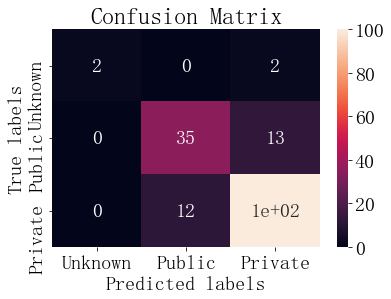

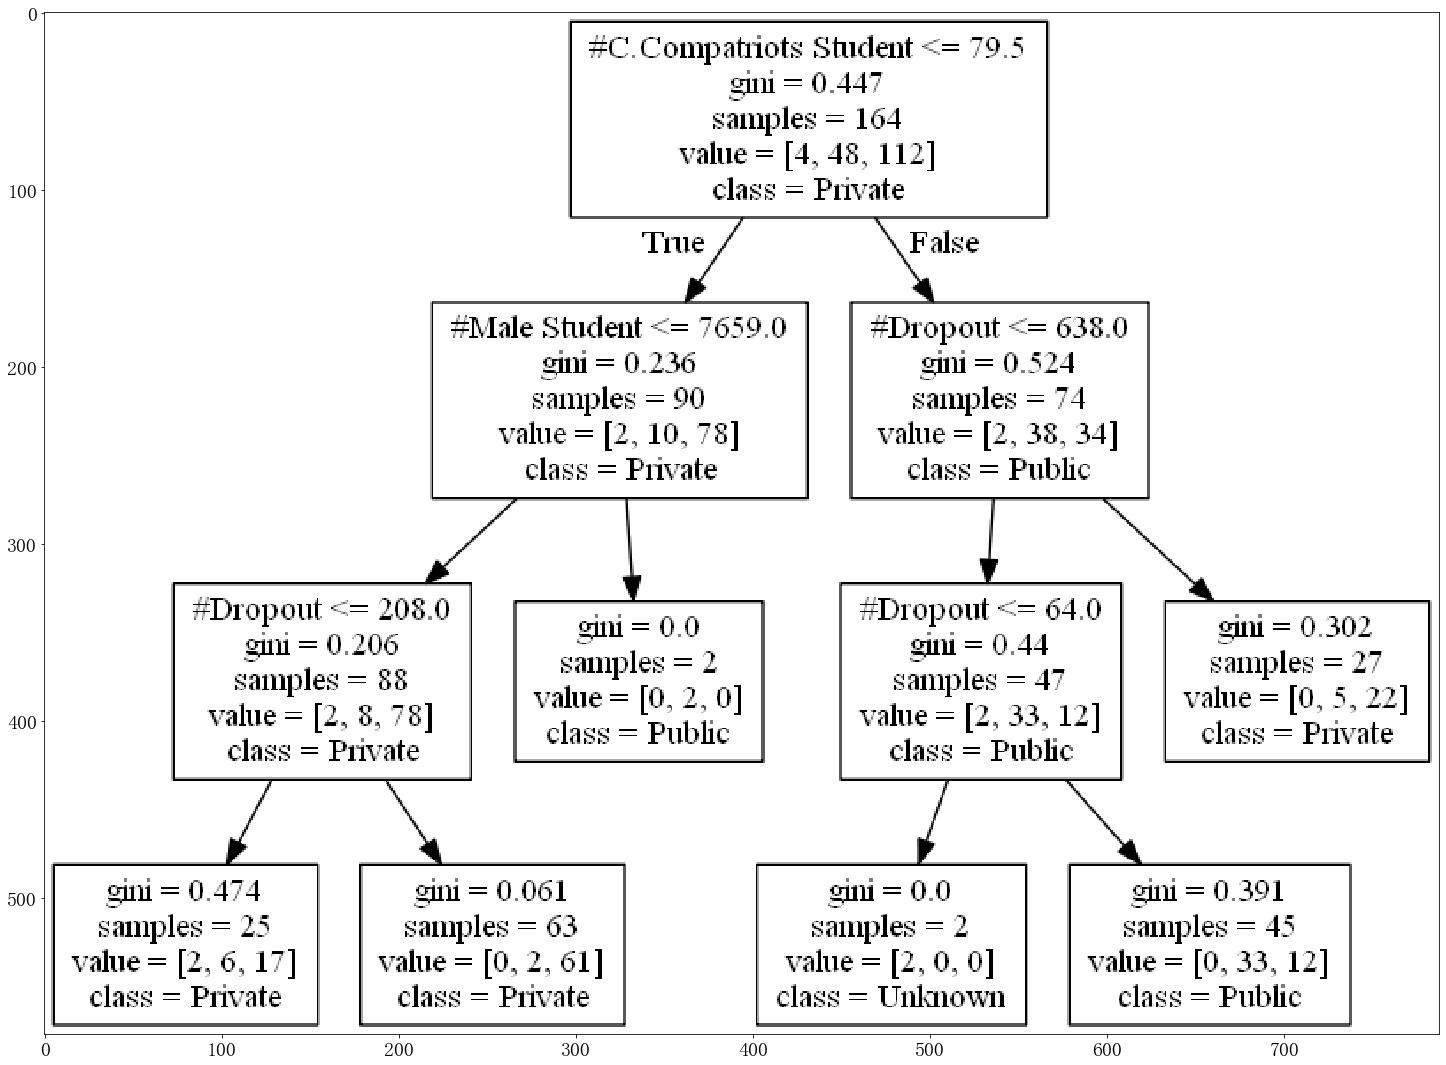

In [39]:
# Classification of university attributes with Y=設立別
# conda install -c conda-forge pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


dt = DecisionTreeClassifier(max_depth=3,
                            min_samples_split=40)
classification_training_x_df = combined_df.copy().select_dtypes('float').fillna(0).astype(int)
classification_training_x_df.columns = ['#Student', '#Male Student', '#Female Student', '#Late Graduation', '#Staff',
                                       '#Foreign Student', '#C.Compatriots Student', '#Double Degree', '#Dropout', 'Double Major']
classification_training_x = classification_training_x_df.values
classification_training_y = combined_df['設立別'].fillna(0).astype(str)
dt.fit(classification_training_x, classification_training_y)

# Do confusion matrix
classification_predict_y = dt.predict(classification_training_x)
cm = confusion_matrix(classification_training_y, classification_predict_y)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Unknown','Public','Private']);
ax.yaxis.set_ticklabels(['Unknown','Public','Private']);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Do classification report
report = classification_report(classification_training_y, classification_predict_y, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

# Export tree to dot file
class_labels = ['Unknown','Public','Private']
dot_data = export_graphviz(dt, out_file='tree.dot', feature_names=classification_training_x_df.columns, 
                           class_names=class_labels)
import pydotplus 
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
plt.figure(figsize=(25, 25))
plt.imshow(plt.imread('tree.png'))


,precision,recall,f1-score,support
0,0.500000,0.250000,0.333333,4.000000
一般大學,0.876923,0.814286,0.844444,70.000000
宗教研修學院,0.454545,1.000000,0.625000,5.000000
技專校院,0.872093,0.882353,0.877193,85.000000
accuracy,0.841463,0.841463,0.841463,0.841463
macro avg,0.675890,0.736660,0.669993,164.000000
weighted avg,0.852349,0.841463,0.842261,164.000000


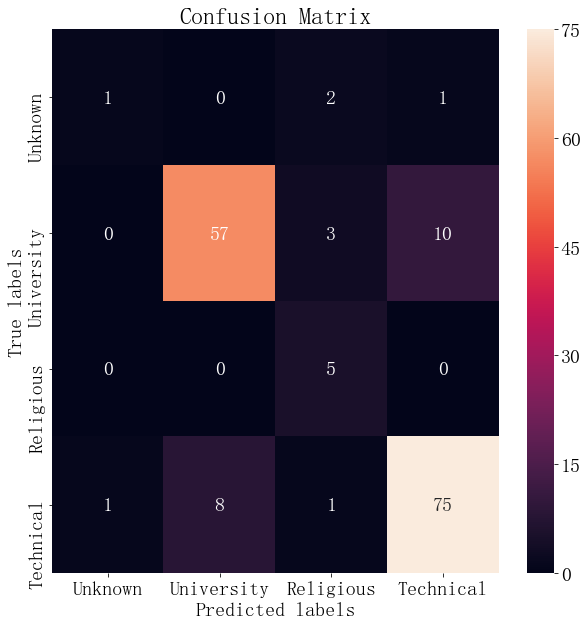

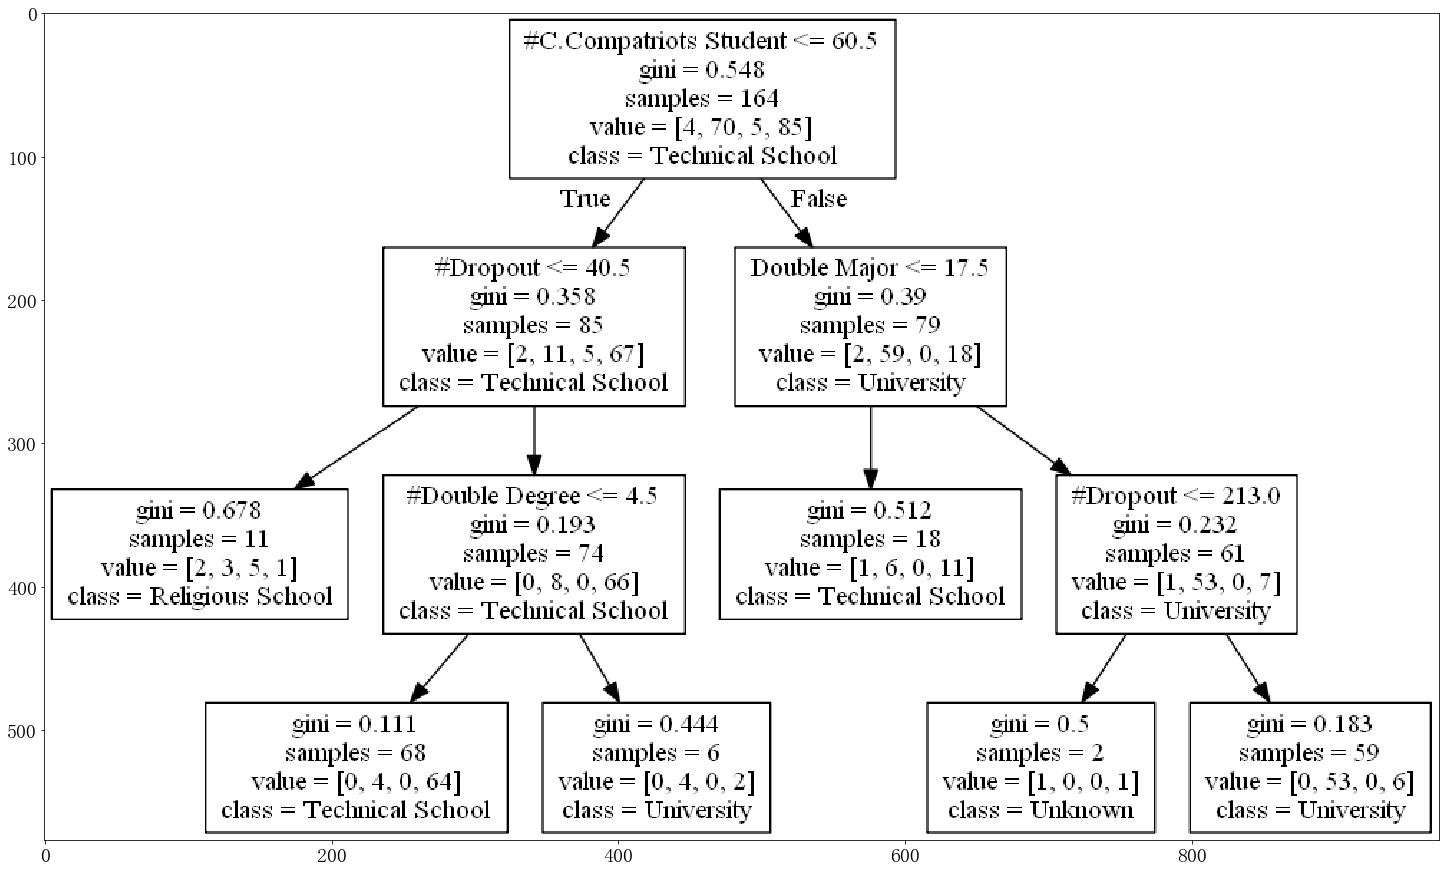

In [40]:
# Classification of university attributes with Y=學校類別
# conda install -c conda-forge pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

dt = DecisionTreeClassifier(max_depth=3,
                            min_samples_split=40)
classification_training_x2_df = combined_df.copy().select_dtypes('float').fillna(0).astype(int)
classification_training_x2_df.columns = ['#Student', '#Male Student', '#Female Student', '#Late Graduation', '#Staff',
                                       '#Foreign Student', '#C.Compatriots Student', '#Double Degree', '#Dropout', 'Double Major']
classification_training_x2 = classification_training_x2_df.values
classification_training_y2 = combined_df['學校類別'].fillna(0).astype(str)
dt.fit(classification_training_x2, classification_training_y2)

# Do confusion matrix
classification_predict_y2 = dt.predict(classification_training_x2)
cm2 = confusion_matrix(classification_training_y2, classification_predict_y2)
plt.figure(figsize=(10,10))
ax2 = plt.subplot()#(figsize=(25,25))
sns.heatmap(cm2, annot=True, ax=ax2)
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels');
ax2.set_title('Confusion Matrix')
ax2.xaxis.set_ticklabels(['Unknown','University','Religious','Technical']);
ax2.yaxis.set_ticklabels(['Unknown','University','Religious','Technical']);
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)

# Do classification report
report2 = classification_report(classification_training_y2, classification_predict_y2, output_dict=True)
report2_df = pd.DataFrame(report2).transpose()
display(report2_df)

# Export tree to dot file
class_labels2 = ['Unknown','University','Religious School','Technical School']
dot_data2 = export_graphviz(dt, out_file='tree2.dot', feature_names=classification_training_x2_df.columns, 
                           class_names=class_labels2)
import pydotplus 
graph = pydotplus.graphviz.graph_from_dot_file('tree2.dot')
graph.write_png('tree2.png')
plt.figure(figsize=(25, 25))
plt.imshow(plt.imread('tree2.png'))


,Coefficient
Feature,
學生總和,0.025456
男學生總和,0.024549
女學生總和,0.000907
延畢生總和,0.858021
教師總和,-0.298681
外籍生總和,0.273113
僑生總和,-0.441692
雙主修總和,-0.165050


Intercept:  143.93005253126978
Score of result: 0.6957956526192925


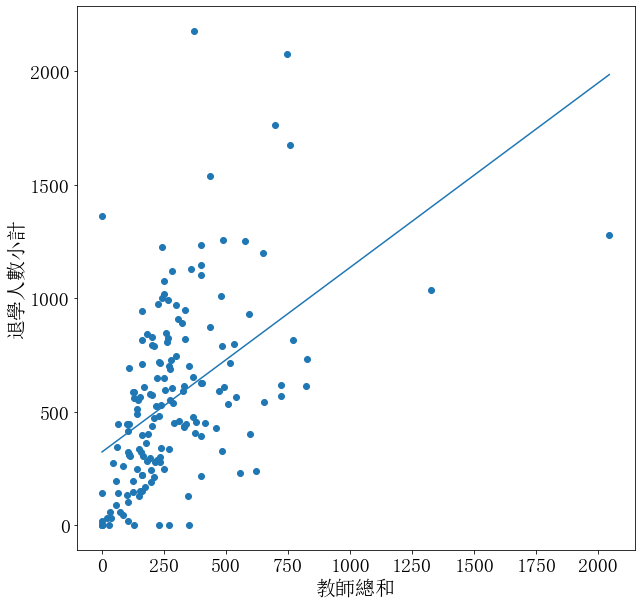

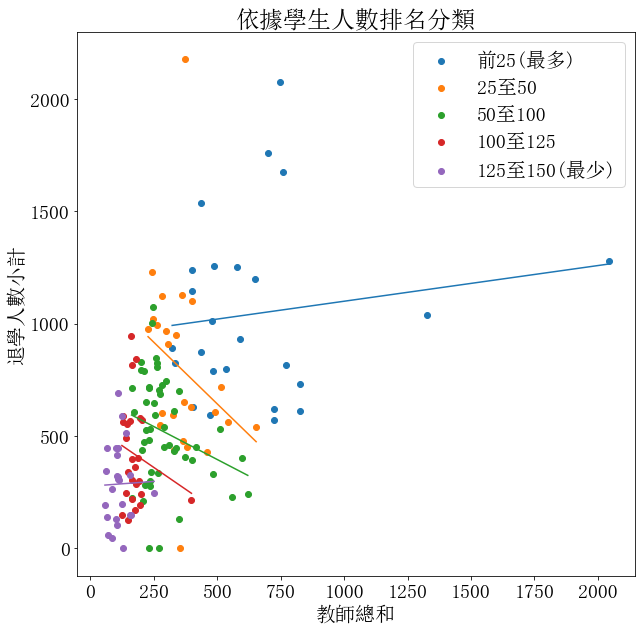

In [41]:
# Linear Regression of University Attributes with Y=退學生人數
from sklearn import linear_model

lr = linear_model.LinearRegression()
regression_training_x2_df = combined_df.copy().select_dtypes('float').fillna(0).astype(int)
del regression_training_x2_df['退學人數小計'] 
del regression_training_x2_df['建立跨國(境)學位合作(雙聯學制)學校數'] 

regression_training_x2 = regression_training_x2_df.values
regression_training_y2 = combined_df['退學人數小計'].fillna(0).astype(int)
regression_training_y2 = regression_training_y2.values
lr.fit(regression_training_x2, regression_training_y2)

lr_result2_df = pd.DataFrame({'Feature':regression_training_x2_df.columns,
                             'Coefficient':lr.coef_})
lr_result2_df.set_index('Feature', inplace=True)
display(lr_result2_df)
print('Intercept: ', lr.intercept_)
print('Score of result:', lr.score(regression_training_x2,regression_training_y2))

# Scatter plot analysis of 退學生人數
x = combined_df['教師總和'].fillna(0, inplace=False).astype(float)
y = combined_df['退學人數小計'].fillna(0, inplace=False).astype(float)

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.xlabel('教師總和')
plt.ylabel('退學人數小計')
plt.show()

# Separate data according to student number 
sorting_df.sort_values('學生總和', inplace=True, ascending=False)
top1_x = sorting_df.iloc[0:25,5].fillna(0, inplace=False).astype(float)
top2_x = sorting_df.iloc[25:50,5].fillna(0, inplace=False).astype(float)
mid_x = sorting_df.iloc[50:100,5].fillna(0, inplace=False).astype(float)
btm1_x = sorting_df.iloc[100:125,5].fillna(0, inplace=False).astype(float)
btm2_x = sorting_df.iloc[125:150,5].fillna(0, inplace=False).astype(float)

top1_y = sorting_df.iloc[0:25,9].fillna(0, inplace=False).astype(float)
top2_y = sorting_df.iloc[25:50,9].fillna(0, inplace=False).astype(float)
mid_y = sorting_df.iloc[50:100,9].fillna(0, inplace=False).astype(float)
btm1_y = sorting_df.iloc[100:125,9].fillna(0, inplace=False).astype(float)
btm2_y = sorting_df.iloc[125:150,9].fillna(0, inplace=False).astype(float)

plt.figure(figsize=(10,10))
p1 = plt.scatter(top1_x, top1_y)
plt.plot(np.unique(top1_x), np.poly1d(np.polyfit(top1_x,top1_y,1))(np.unique(top1_x)))

p2 = plt.scatter(top2_x, top2_y)
plt.plot(np.unique(top2_x), np.poly1d(np.polyfit(top2_x,top2_y,1))(np.unique(top2_x)))

p3 = plt.scatter(mid_x, mid_y)
plt.plot(np.unique(mid_x), np.poly1d(np.polyfit(mid_x,mid_y,1))(np.unique(mid_x)))


p4 = plt.scatter(btm1_x, btm1_y)
plt.plot(np.unique(btm1_x), np.poly1d(np.polyfit(btm1_x,btm1_y,1))(np.unique(btm1_x)))


p5 = plt.scatter(btm2_x, btm2_y)
plt.plot(np.unique(btm2_x), np.poly1d(np.polyfit(btm2_x,btm2_y,1))(np.unique(btm2_x)))

plt.xlabel('教師總和')
plt.ylabel('退學人數小計')
plt.title('依據學生人數排名分類')
plt.legend((p1,p2,p3,p4,p5),
           ('前25(最多)','25至50','50至100','100至125','125至150(最少)'),
            loc='upper right',
            fontsize=20)
plt.show()



,Coefficient
Feature,
學生總和,0.026598
男學生總和,0.010520
女學生總和,0.016079
教師總和,-0.383021
外籍生總和,-0.057656
僑生總和,0.141507
退學人數小計,0.194039
雙主修總和,0.110699


Intercept:  -35.01365406083249
Score of result: 0.8523439028149974


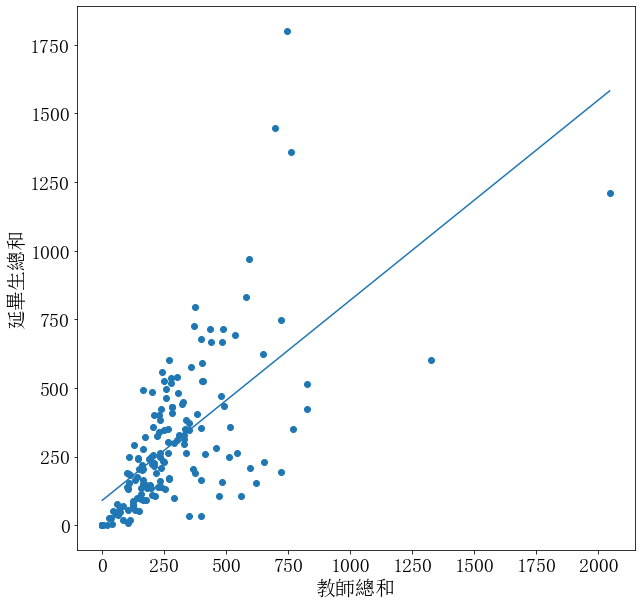

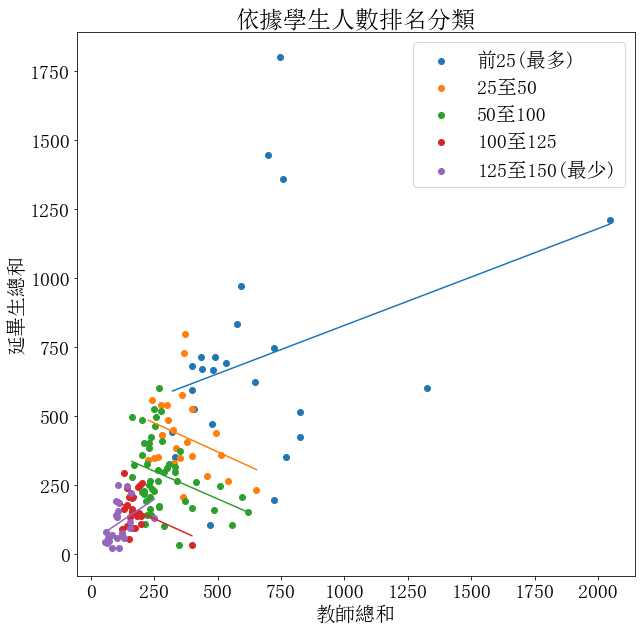

In [42]:
# Linear Regression of University Attributes with Y=延畢生總和
from sklearn import linear_model

lr = linear_model.LinearRegression()
regression_training_x_df = combined_df.copy().select_dtypes('float').fillna(0).astype(int)
del regression_training_x_df['延畢生總和'] 
del regression_training_x_df['建立跨國(境)學位合作(雙聯學制)學校數'] 

regression_training_x = regression_training_x_df.values
regression_training_y = combined_df['延畢生總和'].fillna(0).astype(int)
regression_training_y = regression_training_y.values
lr.fit(regression_training_x, regression_training_y)
lr_result_df = pd.DataFrame({'Feature':regression_training_x_df.columns,
                             'Coefficient':lr.coef_})

lr_result_df.set_index('Feature', inplace=True)
display(lr_result_df)
print('Intercept: ', lr.intercept_)
print('Score of result:', lr.score(regression_training_x,regression_training_y))

# To show scatter matrix of 延畢生總和 vs 教師總和
mpl.rcParams['font.size'] = 20
x = combined_df['教師總和'].fillna(0, inplace=False).astype(float)
y = combined_df['延畢生總和'].fillna(0, inplace=False).astype(float)
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.xlabel('教師總和')
plt.ylabel('延畢生總和')
plt.show()

# Separate data according to student number 
mpl.rcParams['font.size'] = 20
sorting_df.sort_values('學生總和', inplace=True, ascending=False)
top1_x = sorting_df.iloc[0:25,5].fillna(0, inplace=False).astype(float)
top2_x = sorting_df.iloc[25:50,5].fillna(0, inplace=False).astype(float)
mid_x = sorting_df.iloc[50:100,5].fillna(0, inplace=False).astype(float)
btm1_x = sorting_df.iloc[100:125,5].fillna(0, inplace=False).astype(float)
btm2_x = sorting_df.iloc[125:150,5].fillna(0, inplace=False).astype(float)

top1_y = sorting_df.iloc[0:25,4].fillna(0, inplace=False).astype(float)
top2_y = sorting_df.iloc[25:50,4].fillna(0, inplace=False).astype(float)
mid_y = sorting_df.iloc[50:100,4].fillna(0, inplace=False).astype(float)
btm1_y = sorting_df.iloc[100:125,4].fillna(0, inplace=False).astype(float)
btm2_y = sorting_df.iloc[125:150,4].fillna(0, inplace=False).astype(float)

plt.figure(figsize=(10,10))
p1 = plt.scatter(top1_x, top1_y)
plt.plot(np.unique(top1_x), np.poly1d(np.polyfit(top1_x,top1_y,1))(np.unique(top1_x)))

p2 = plt.scatter(top2_x, top2_y)
plt.plot(np.unique(top2_x), np.poly1d(np.polyfit(top2_x,top2_y,1))(np.unique(top2_x)))

p3 = plt.scatter(mid_x, mid_y)
plt.plot(np.unique(mid_x), np.poly1d(np.polyfit(mid_x,mid_y,1))(np.unique(mid_x)))


p4 = plt.scatter(btm1_x, btm1_y)
plt.plot(np.unique(btm1_x), np.poly1d(np.polyfit(btm1_x,btm1_y,1))(np.unique(btm1_x)))


p5 = plt.scatter(btm2_x, btm2_y)
plt.plot(np.unique(btm2_x), np.poly1d(np.polyfit(btm2_x,btm2_y,1))(np.unique(btm2_x)))

plt.xlabel('教師總和')
plt.ylabel('延畢生總和')
plt.title('依據學生人數排名分類')
plt.legend((p1,p2,p3,p4,p5),
           ('前25(最多)','25至50','50至100','100至125','125至150(最少)'),
            loc='upper right',
            fontsize=20)
plt.show()

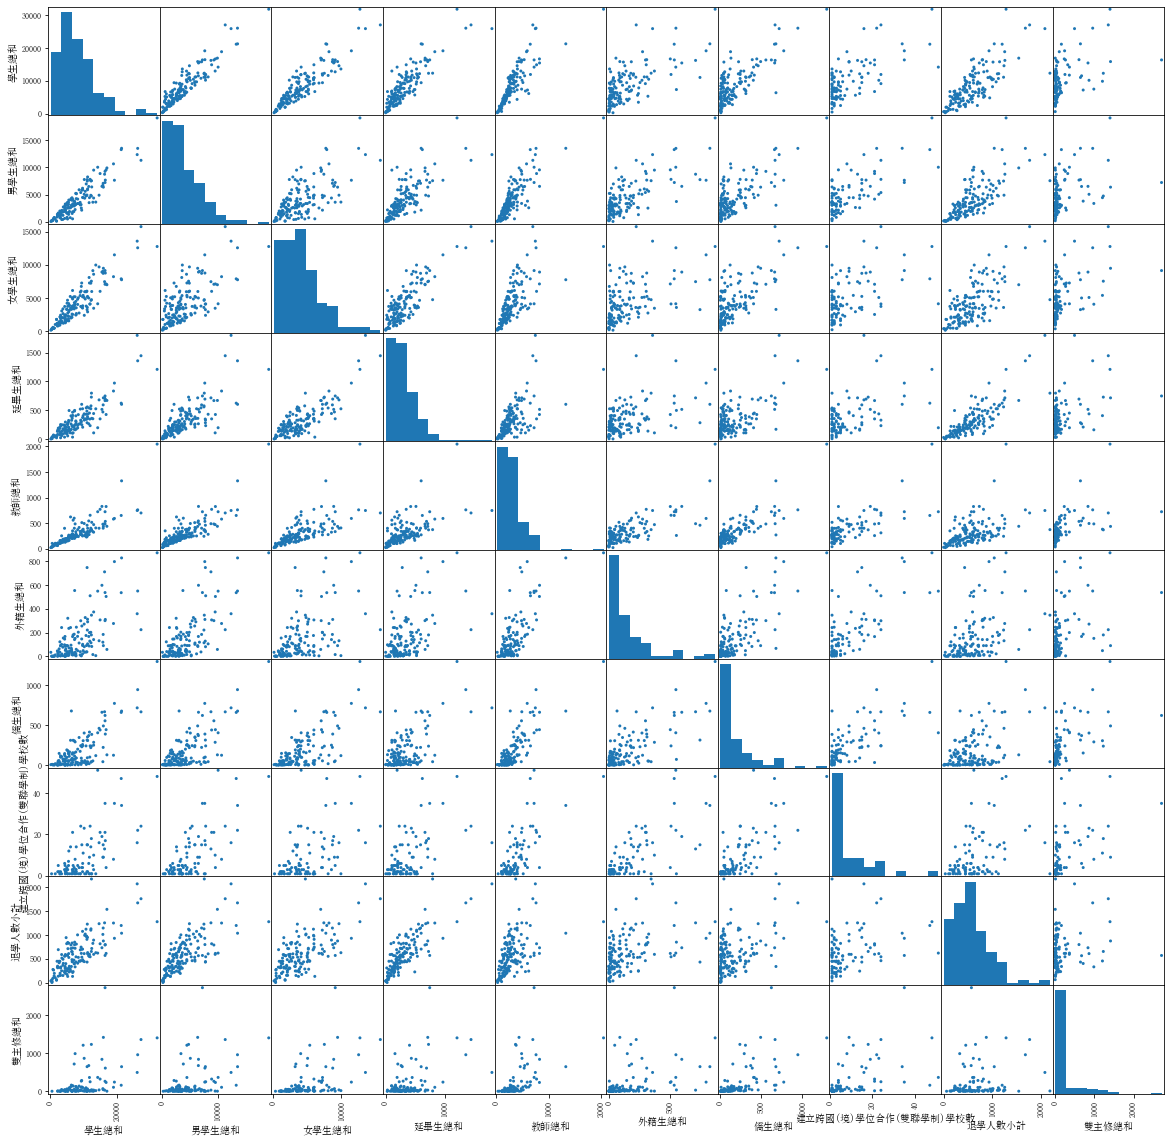

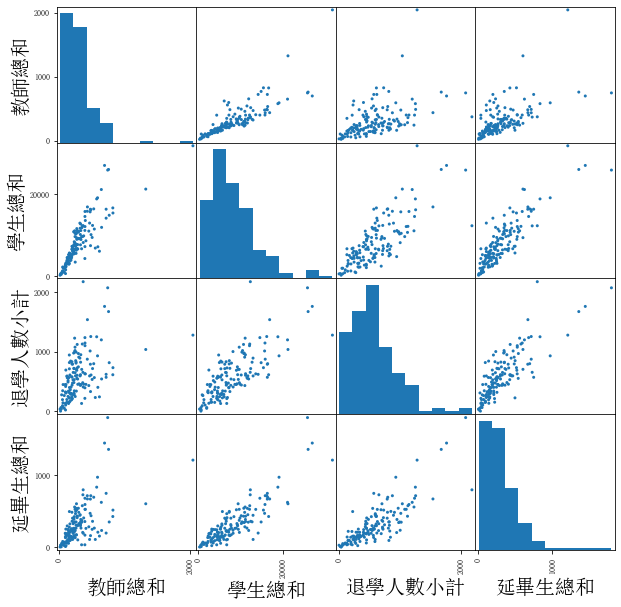

In [44]:
from pandas.plotting import scatter_matrix


# To show scatter matrix of all features
mpl.rcParams['font.size'] = 10
scatter_matrix(combined_df, alpha=1, figsize=(20,20))
plt.show()

# Select only a few features
mpl.rcParams['font.size'] = 20
scatter_matrix(combined_df[['教師總和','學生總和','退學人數小計','延畢生總和']], alpha=1, figsize=(10,10))
plt.show()
